In [65]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [66]:
df=pd.read_csv('/config/workspace/Dataset/diabetes.csv')

In [67]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [69]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [70]:
### There are some data which minimum values are 0 but that should not be zero so we goona take that zeros to the data mean point
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())

In [71]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

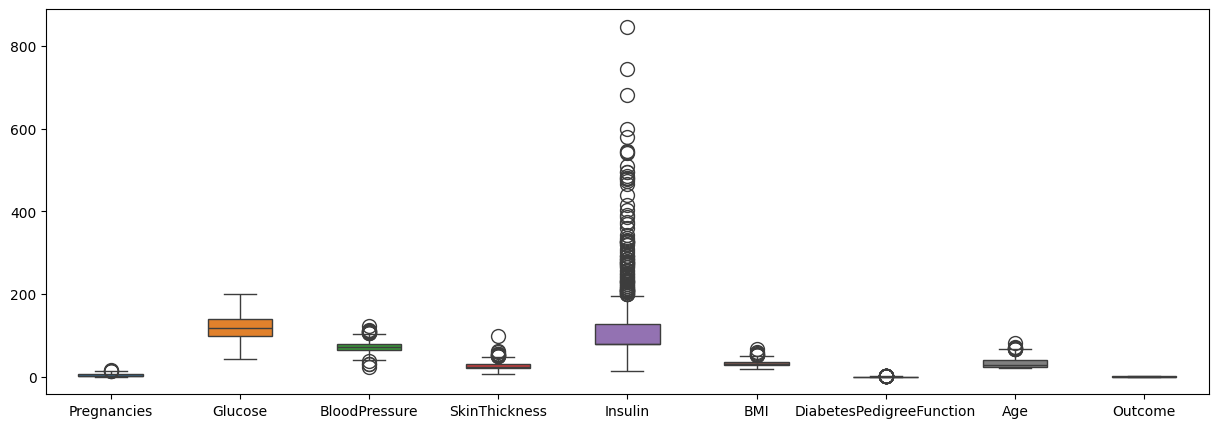

In [72]:
fg, ax= plt.subplots(figsize=(15,5))
sns.boxplot(data=df,ax=ax,width=0.5, fliersize=10)

In [73]:
#Deviding dependent and independent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [74]:
### Diving data to trainning and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [75]:
import pickle
def scalers(X_test,X_train):
    scaler=StandardScaler()
    X_trains=scaler.fit_transform(X_train)
    X_tests=scaler.transform(X_test)

    file=open('/config/workspace/Model/scaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    return X_trains,X_tests

In [76]:
### Scaled Data
X_train,X_test=scalers(X_test,X_train)

In [77]:
X_train

array([[ 2.80346794,  0.24258793, -0.25110513, ...,  1.10366684,
         0.29608546,  0.96352088],
       [ 0.07832678,  0.24258793,  1.14476384, ...,  0.40523314,
        -0.70087555, -0.86295593],
       [-0.22446668, -2.01997244,  0.81427371, ...,  0.30337823,
        -0.66548048,  1.13747105],
       ...,
       [ 1.89508755, -0.68905457,  1.14476384, ...,  1.93305686,
         1.96850229,  0.44167036],
       [-1.13284707,  0.64186329, -0.25110513, ...,  1.46743439,
        -0.77756486, -0.34110542],
       [-1.13284707,  0.10949615,  1.97098917, ..., -1.42815531,
        -0.6094383 , -1.03690611]])

In [78]:
y_train.shape,X_train.shape

((576,), (576, 8))

In [79]:
Lregression=LogisticRegression()
Lregression.fit(X_train,y_train)

LogisticRegression()

In [80]:
from sklearn.model_selection import GridSearchCV

parameters={

    'penalty': ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-3,3,7),
    'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

}

In [81]:
logre=LogisticRegression()
clf=GridSearchCV(logre,param_grid= parameters, scoring='accuracy',cv=10)
clf.fit(X_train,y_train)


/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
700 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/config/.local/lib/python3.8/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.du

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [82]:
clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [83]:
clf.best_score_

0.7759225650332727

In [84]:
y_pred=clf.predict(X_test)

In [85]:
### A confusion matrix summarizes a machine learning model's classification performance with true positives, true negatives, false positives, and false negatives.
cmatrix=confusion_matrix(y_test,y_pred)
cmatrix

array([[99, 24],
       [28, 41]])

In [86]:
true_postive=cmatrix[0][0]
true_negative=cmatrix[1][1]
false_postive=cmatrix[0][1]
false_negative=cmatrix[1][0]

In [87]:
Accuracy=(true_postive+true_negative)/(true_negative+true_postive+false_negative+false_postive)
Accuracy

0.7291666666666666

Usecases
Precision: Ensuring only accurate emails are marked as spam.
Recall: Catching all instances of a rare disease in medical screenings.
F1 Score: Balancing precision and recall for a harmonized performance metric.

In [88]:
Precision=true_postive/(true_postive+false_postive)
Precision

0.8048780487804879

In [89]:
Recall=true_postive/(true_postive+false_negative)
Recall

0.7795275590551181

In [90]:
F1=2*(Recall*Precision)/(Recall+Precision)
F1

0.792

In [91]:
file=open('/config/workspace/Model/lregression.pkl','wb')
pickle.dump(logre,file)
file.close()